<a href="https://colab.research.google.com/github/gitgubbenito/AI_ML/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Hello
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pylab as pl


from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score,precision_recall_curve, roc_curve,confusion_matrix,accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

from sklearn import set_config
set_config(display="diagram")



In [13]:
data_frame = pd.read_csv('bank-full.csv',  sep = ';')

In [14]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [15]:
data_frame.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [17]:
data_frame.loc[data_frame.duplicated()]

data_frame

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
data_frame.dropna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:

data_frame['education'] = data_frame['education'].replace({'unknown': 'unknown_education'})
data_frame['job'] = data_frame['job'].replace({'unknown': 'unknown_job'})
data_frame['poutcome'] = data_frame['poutcome'].replace({'unknown': 'unknown_poutcome'})
data_frame['contact'] = data_frame['contact'].replace({'unknown': 'unknown_contact'})

In [18]:
data_frame=data_frame.query('pdays!=-1')

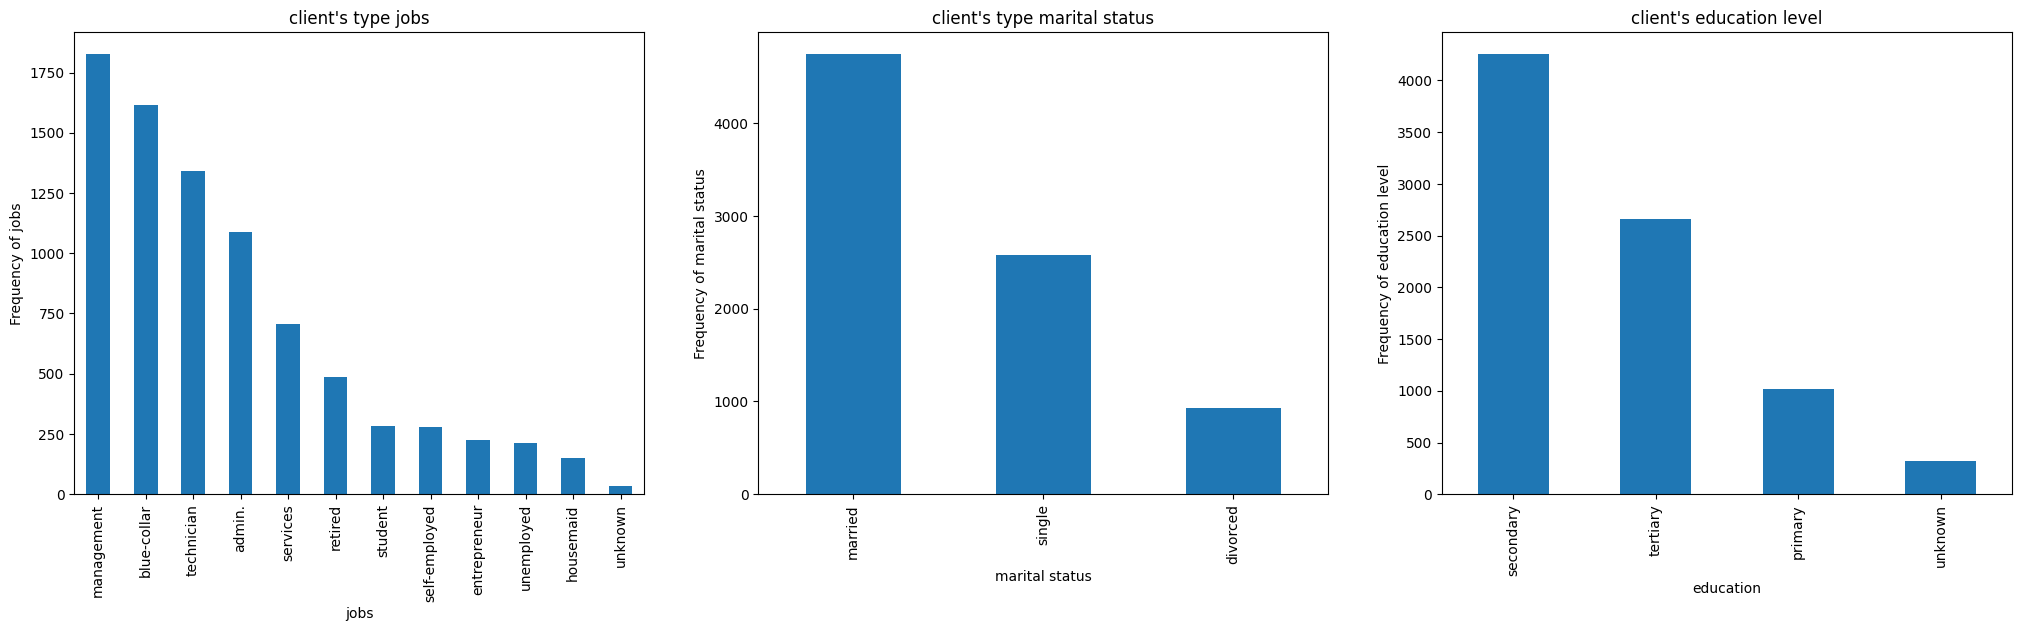

In [19]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = data_frame.job.value_counts().plot(kind='bar')
plt.title("client's type jobs")
plt1.set(xlabel = 'jobs', ylabel='Frequency of jobs')

plt.subplot(1,3,2)
plt1 = data_frame.marital.value_counts().plot(kind='bar')
plt.title("client's type marital status")
plt1.set(xlabel = 'marital status', ylabel='Frequency of marital status')

plt.subplot(1,3,3)
plt1 = data_frame.education.value_counts().plot(kind='bar')
plt.title("client's education level")
plt1.set(xlabel = 'education', ylabel='Frequency of education level')
plt.show()

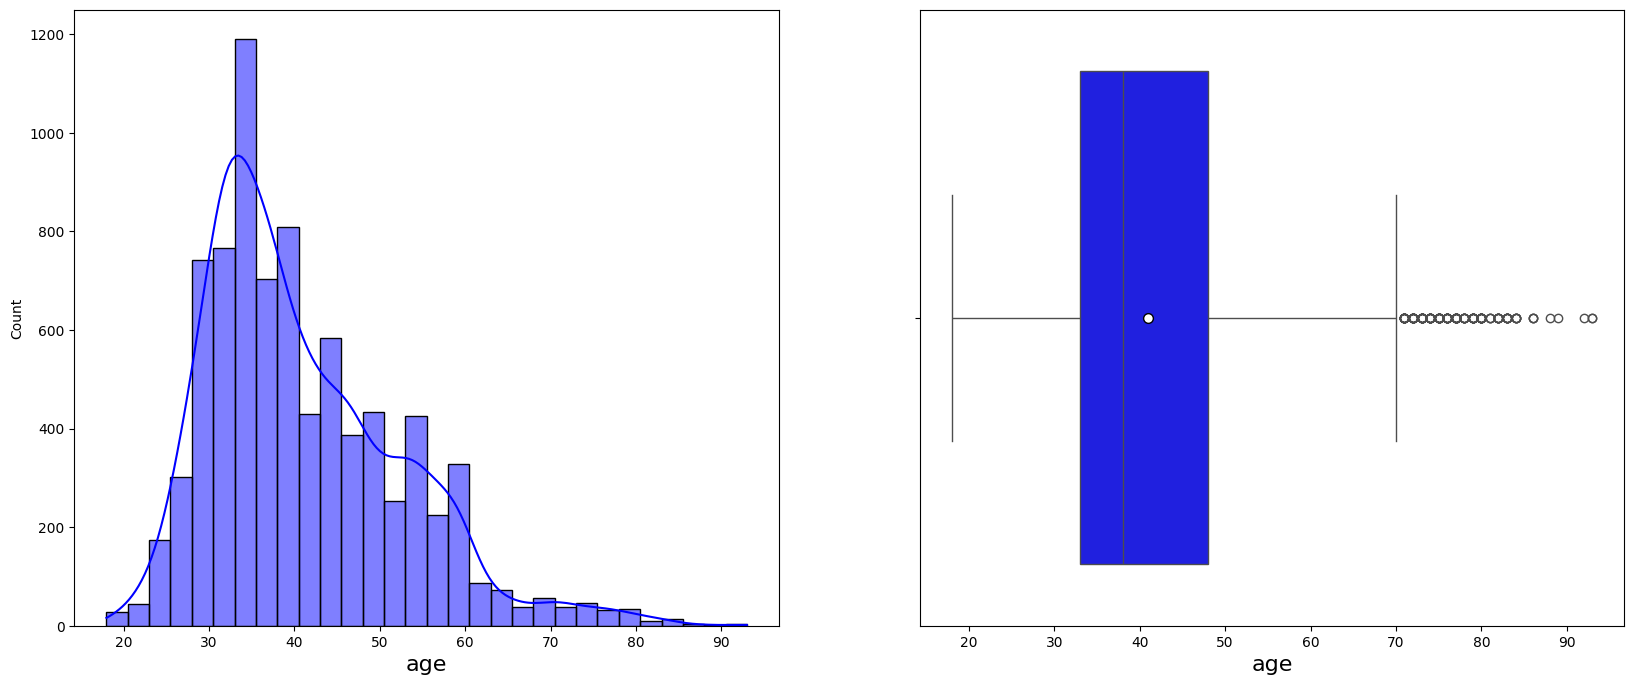

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=data_frame, x="age",kde=True, color="blue",bins=30, ax=axes[0])
ax.set_xlabel('age',fontsize=16)
ax = sns.boxplot(x=data_frame["age"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="blue")
ax.set_xlabel('age',fontsize=16)
plt.show()

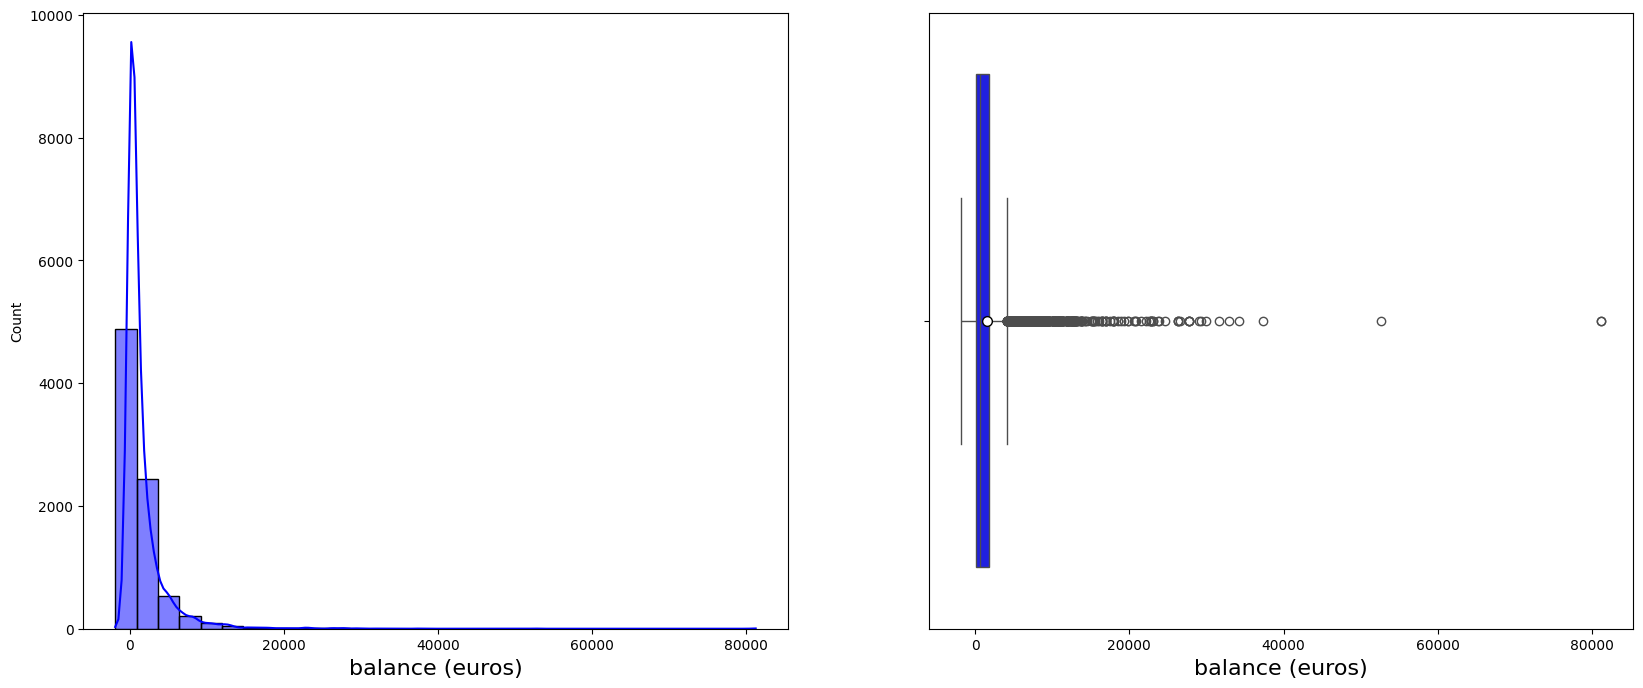

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=data_frame, x="balance",kde=True, color="blue",bins=30, ax=axes[0])
ax.set_xlabel('balance (euros)',fontsize=16)
ax = sns.boxplot(x=data_frame["balance"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="blue")
ax.set_xlabel('balance (euros)',fontsize=16)
plt.show()

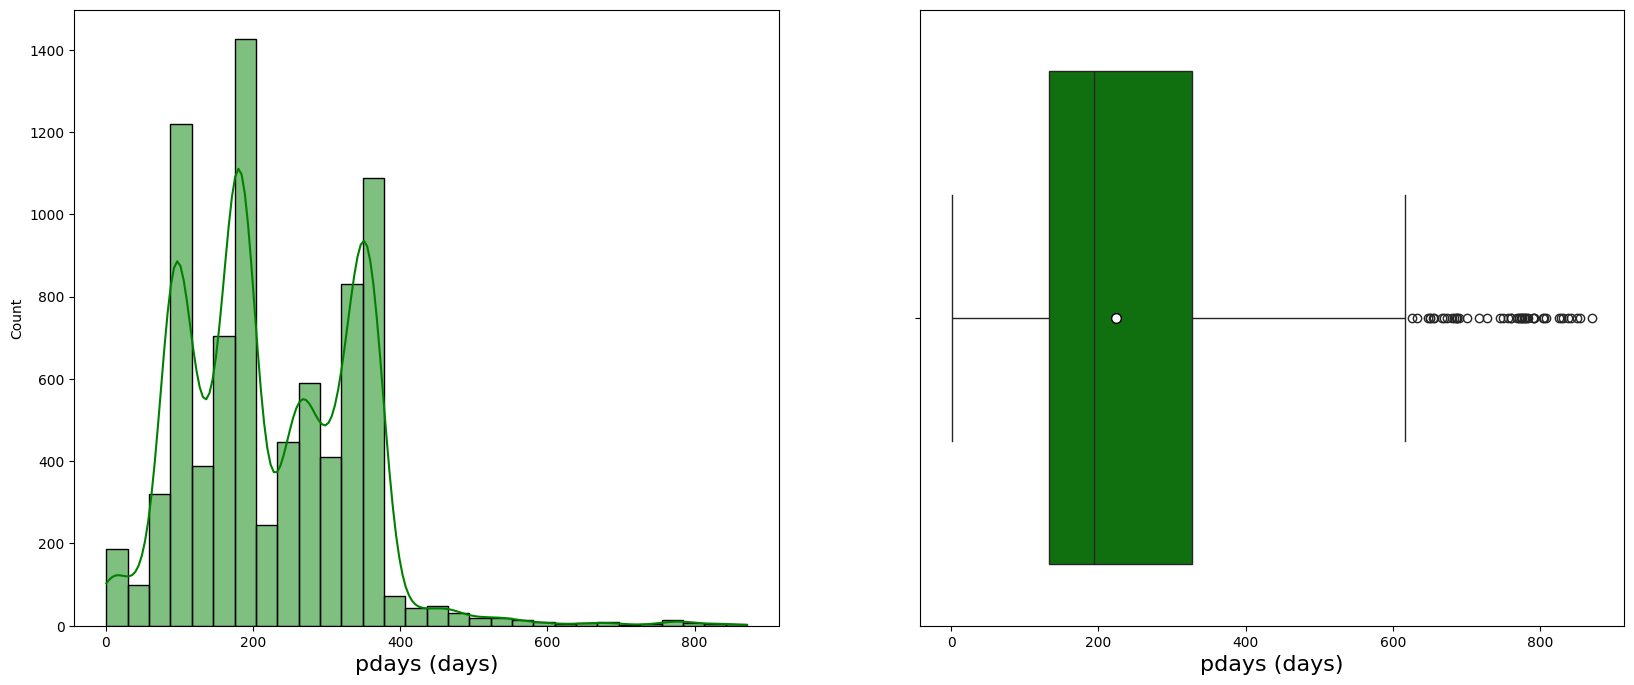

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=data_frame, x="pdays",kde=True, color="green",bins=30, ax=axes[0])
ax.set_xlabel('pdays (days)',fontsize=16)
ax = sns.boxplot(x=data_frame["pdays"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="green")
ax.set_xlabel('pdays (days)',fontsize=16)
plt.show()

In [24]:
def outlierstreat(data,variable):
    first_quartile=data[variable].quantile(0.25)
    third_quartile=data[variable].quantile(0.75)
    iqr= third_quartile - first_quartile
    lower=first_quartile - 1.5*iqr
    lower=0 if lower<0 else lower
    upper=upper=third_quartile + 1.5*iqr
    0 if upper<0 else upper
    print(lower,upper)
    data=data[(data[variable] < upper) &  (data[variable] > lower)]
    return data

In [25]:
variables=['age','balance','pdays']
for variable in variables:
    data_frame=outlierstreat(data_frame,variable)

10.5 70.5
0 3990.25
0 625.5


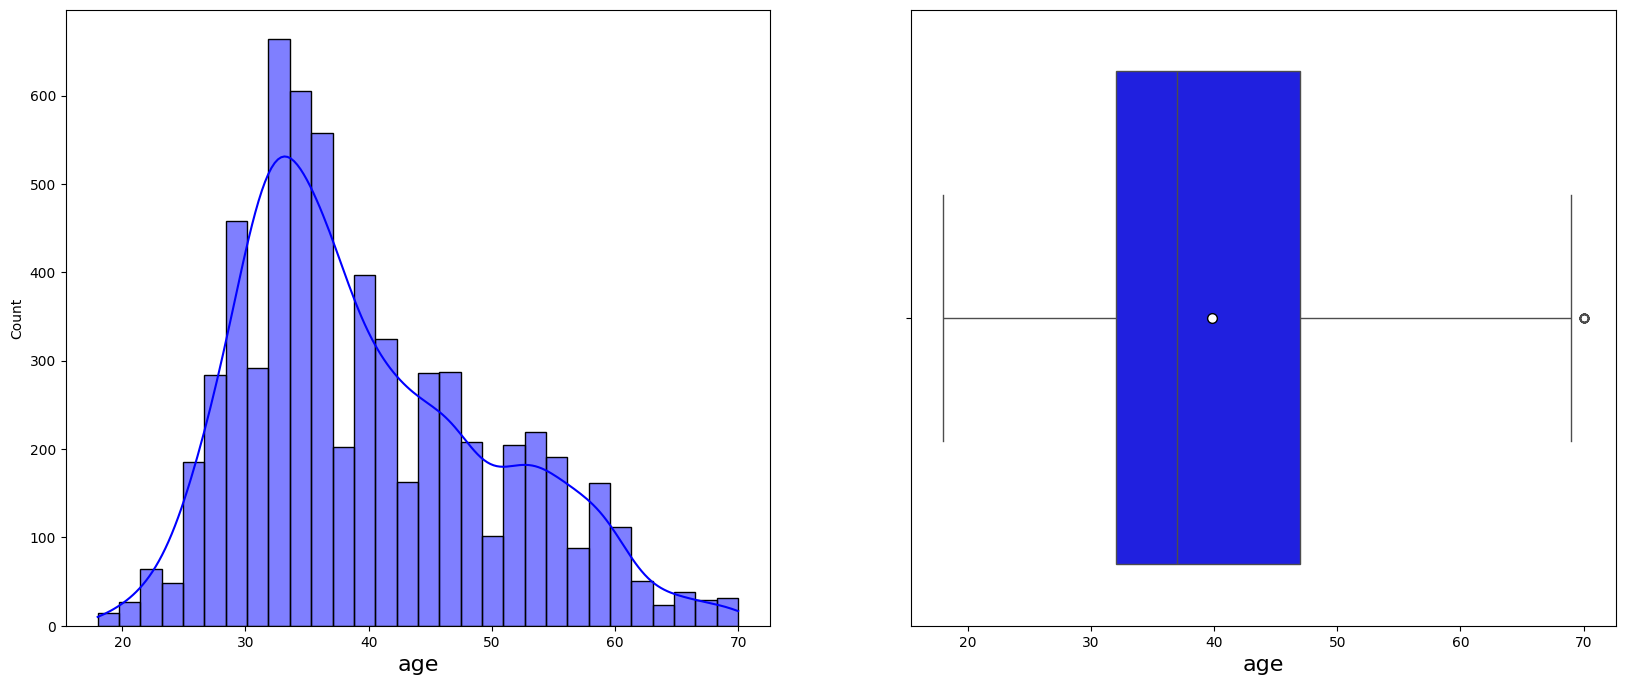

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=data_frame, x="age",kde=True, color="blue",bins=30, ax=axes[0])
ax.set_xlabel('age',fontsize=16)
ax = sns.boxplot(x=data_frame["age"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="blue")
ax.set_xlabel('age',fontsize=16)
plt.show()

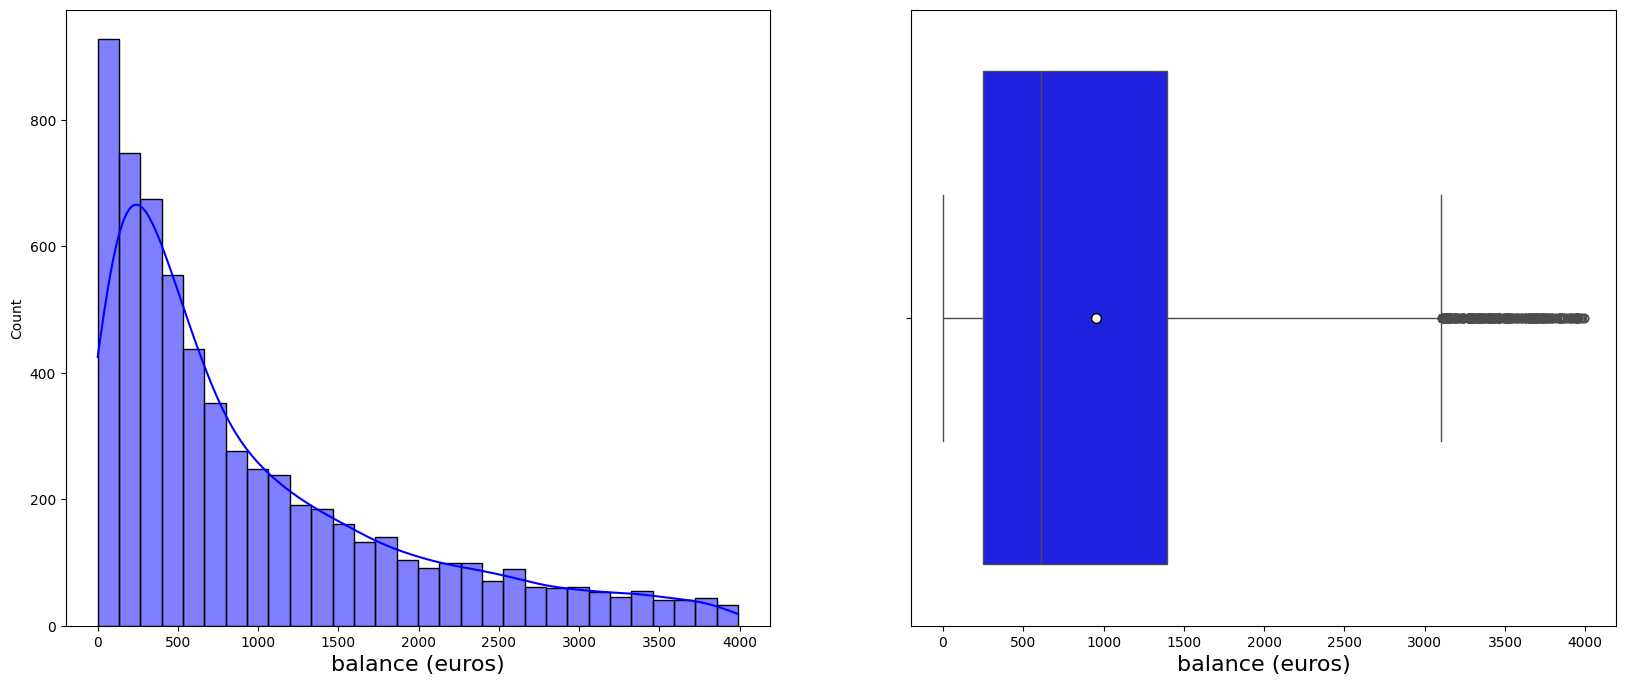

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=data_frame, x="balance",kde=True, color="blue",bins=30, ax=axes[0])
ax.set_xlabel('balance (euros)',fontsize=16)
ax = sns.boxplot(x=data_frame["balance"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="blue")
ax.set_xlabel('balance (euros)',fontsize=16)
plt.show()

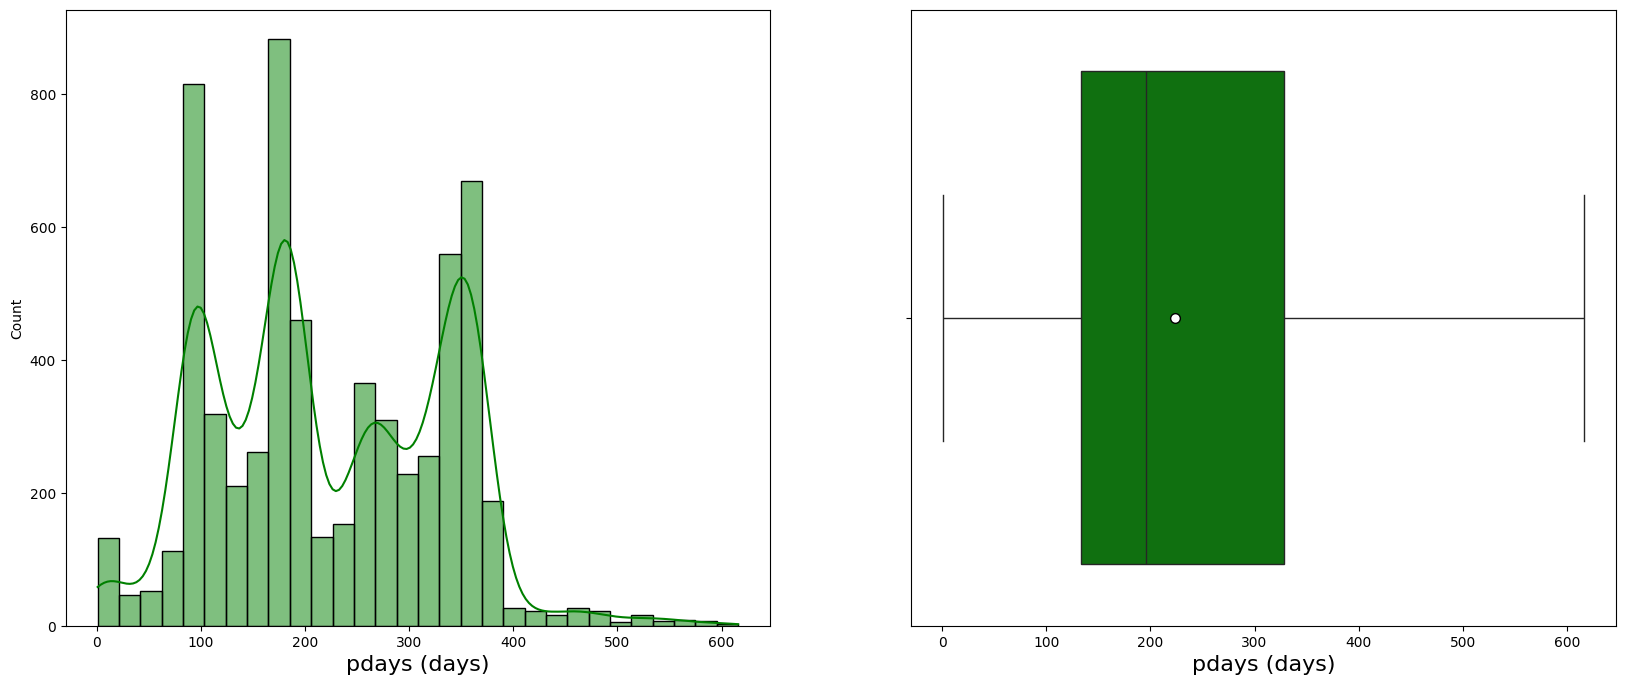

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=data_frame, x="pdays",kde=True, color="green",bins=30, ax=axes[0])
ax.set_xlabel('pdays (days)',fontsize=16)
ax = sns.boxplot(x=data_frame["pdays"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="green")
ax.set_xlabel('pdays (days)',fontsize=16)
plt.show()

In [29]:
print(data_frame['age'].describe(),data_frame['pdays'].describe())

count    6316.000000
mean       39.868746
std        10.269667
min        18.000000
25%        32.000000
50%        37.000000
75%        47.000000
max        70.000000
Name: age, dtype: float64 count    6316.000000
mean      223.408011
std       108.930300
min         1.000000
25%       133.000000
50%       196.000000
75%       328.000000
max       616.000000
Name: pdays, dtype: float64


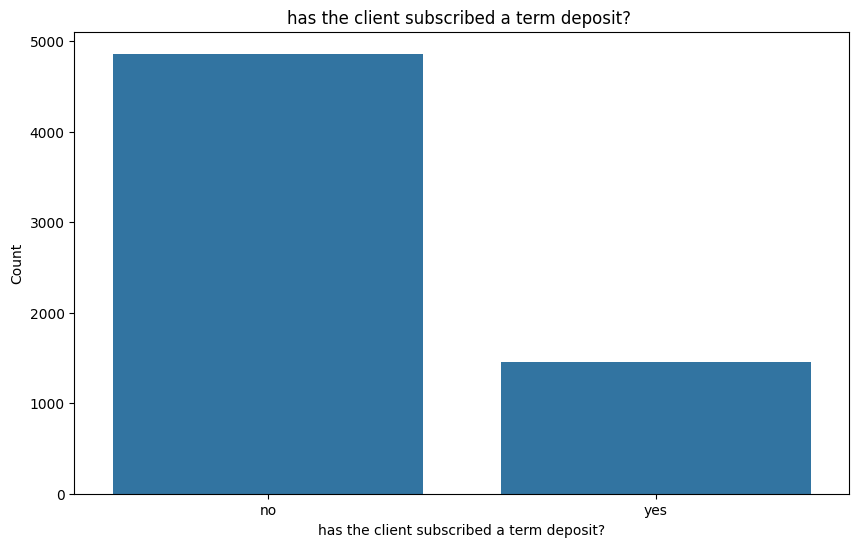

In [30]:
plt.figure(figsize=(10,6))
splot = sns.countplot(data=data_frame, x = 'y')
splot.set_xticklabels(['no', 'yes'])
plt.xlabel('has the client subscribed a term deposit?')
plt.ylabel('Count')
plt.title('has the client subscribed a term deposit? ')
plt.show()

In [31]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6316 entries, 24060 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        6316 non-null   int64 
 1   job        6316 non-null   object
 2   marital    6316 non-null   object
 3   education  6316 non-null   object
 4   default    6316 non-null   object
 5   balance    6316 non-null   int64 
 6   housing    6316 non-null   object
 7   loan       6316 non-null   object
 8   contact    6316 non-null   object
 9   day        6316 non-null   int64 
 10  month      6316 non-null   object
 11  duration   6316 non-null   int64 
 12  campaign   6316 non-null   int64 
 13  pdays      6316 non-null   int64 
 14  previous   6316 non-null   int64 
 15  poutcome   6316 non-null   object
 16  y          6316 non-null   object
dtypes: int64(7), object(10)
memory usage: 888.2+ KB


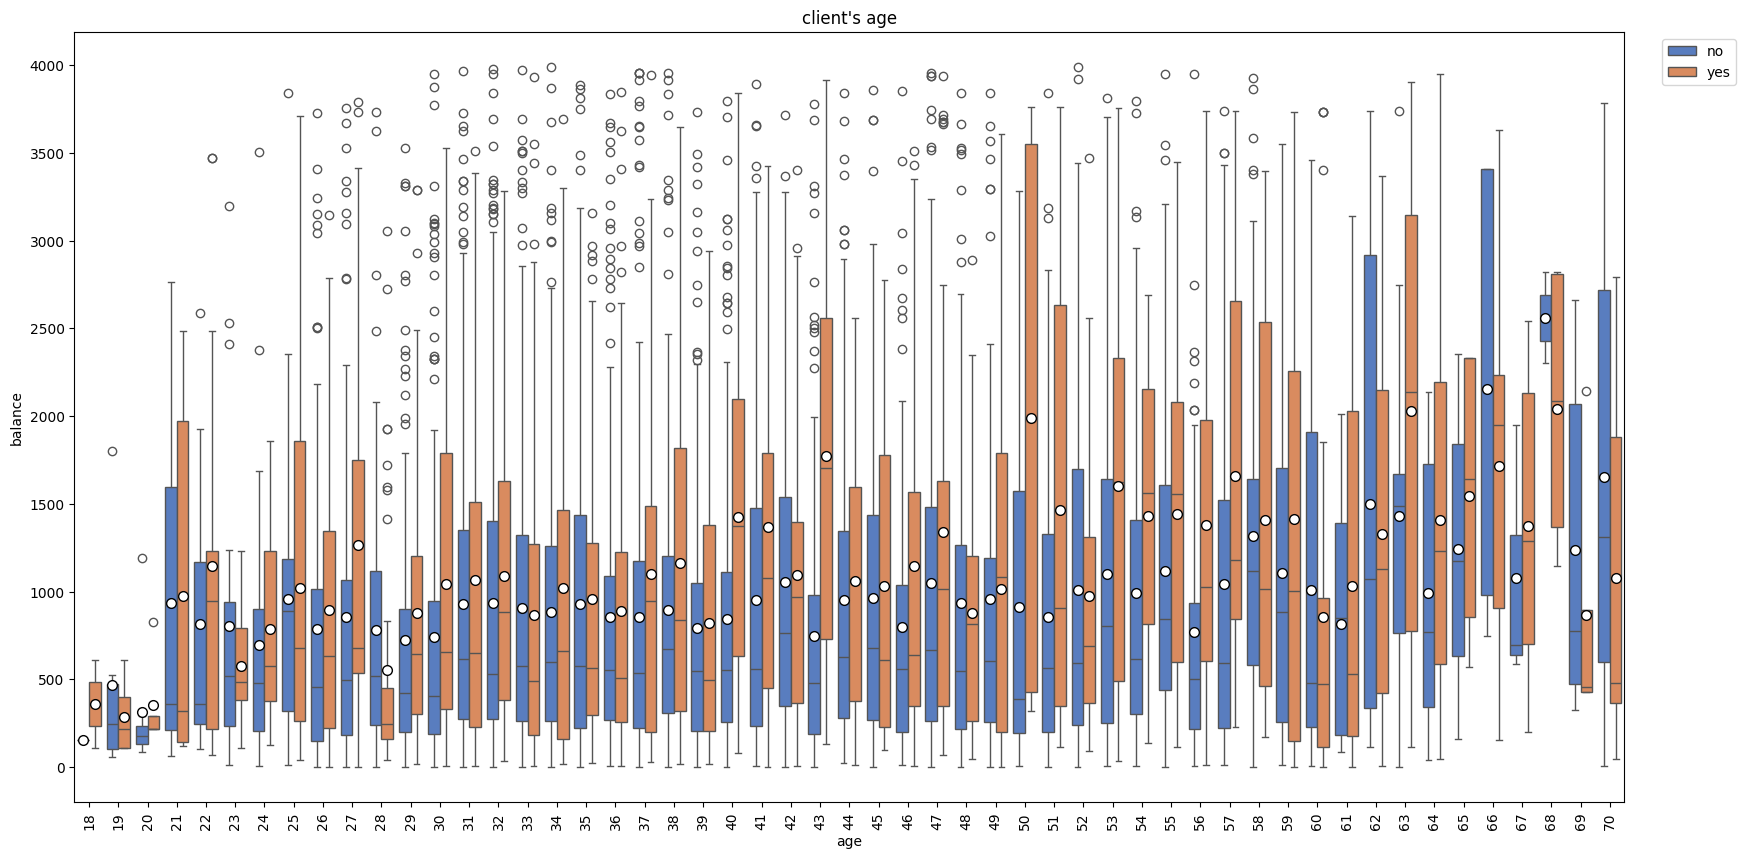

In [32]:
plt.figure(figsize=(20,10))
#plt.ylim(0,120000)
sns.boxplot(x='age', y='balance', hue="y",palette=("muted"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"7"},data=data_frame)
plt.title("client's age")
# Set x-axis label
plt.xlabel('age')
plt.xticks(rotation = 90)
# Set y-axis label
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('balance')
plt.show()

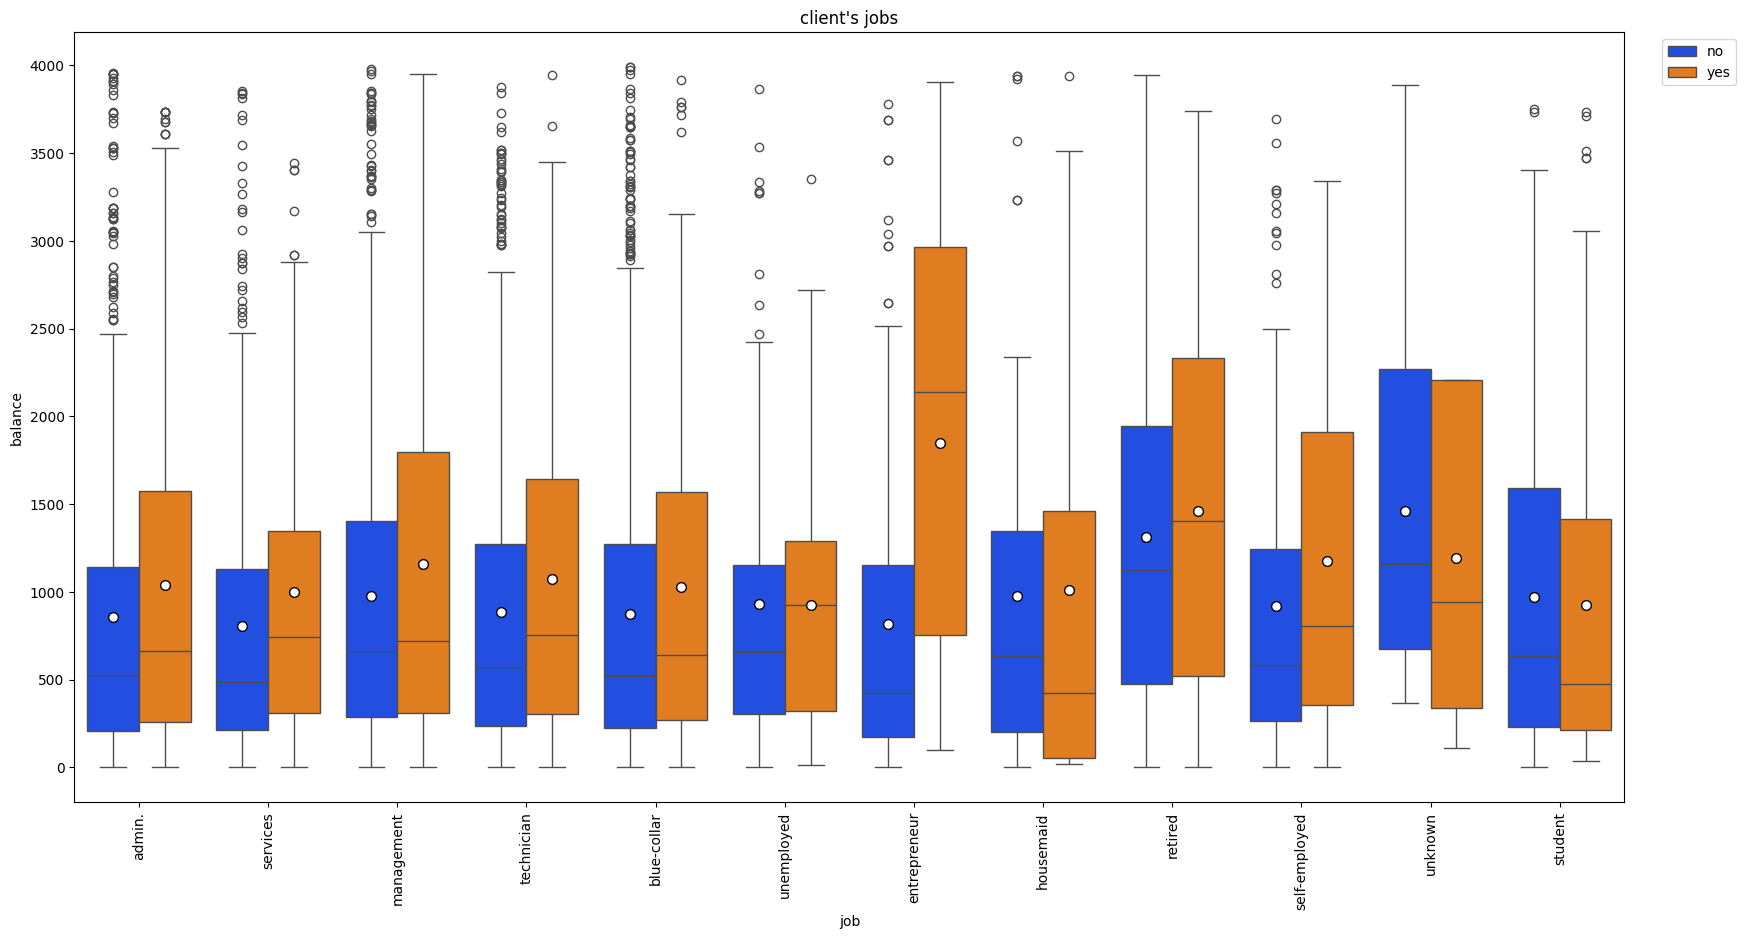

In [33]:
plt.figure(figsize=(20,10))
#plt.ylim(0,120000)
sns.boxplot(x='job', y='balance', hue="y",palette=("bright"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"7"},data=data_frame)
plt.title("client's jobs")
# Set x-axis label
plt.xlabel('job')
# Set y-axis label
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('balance')
plt.show()

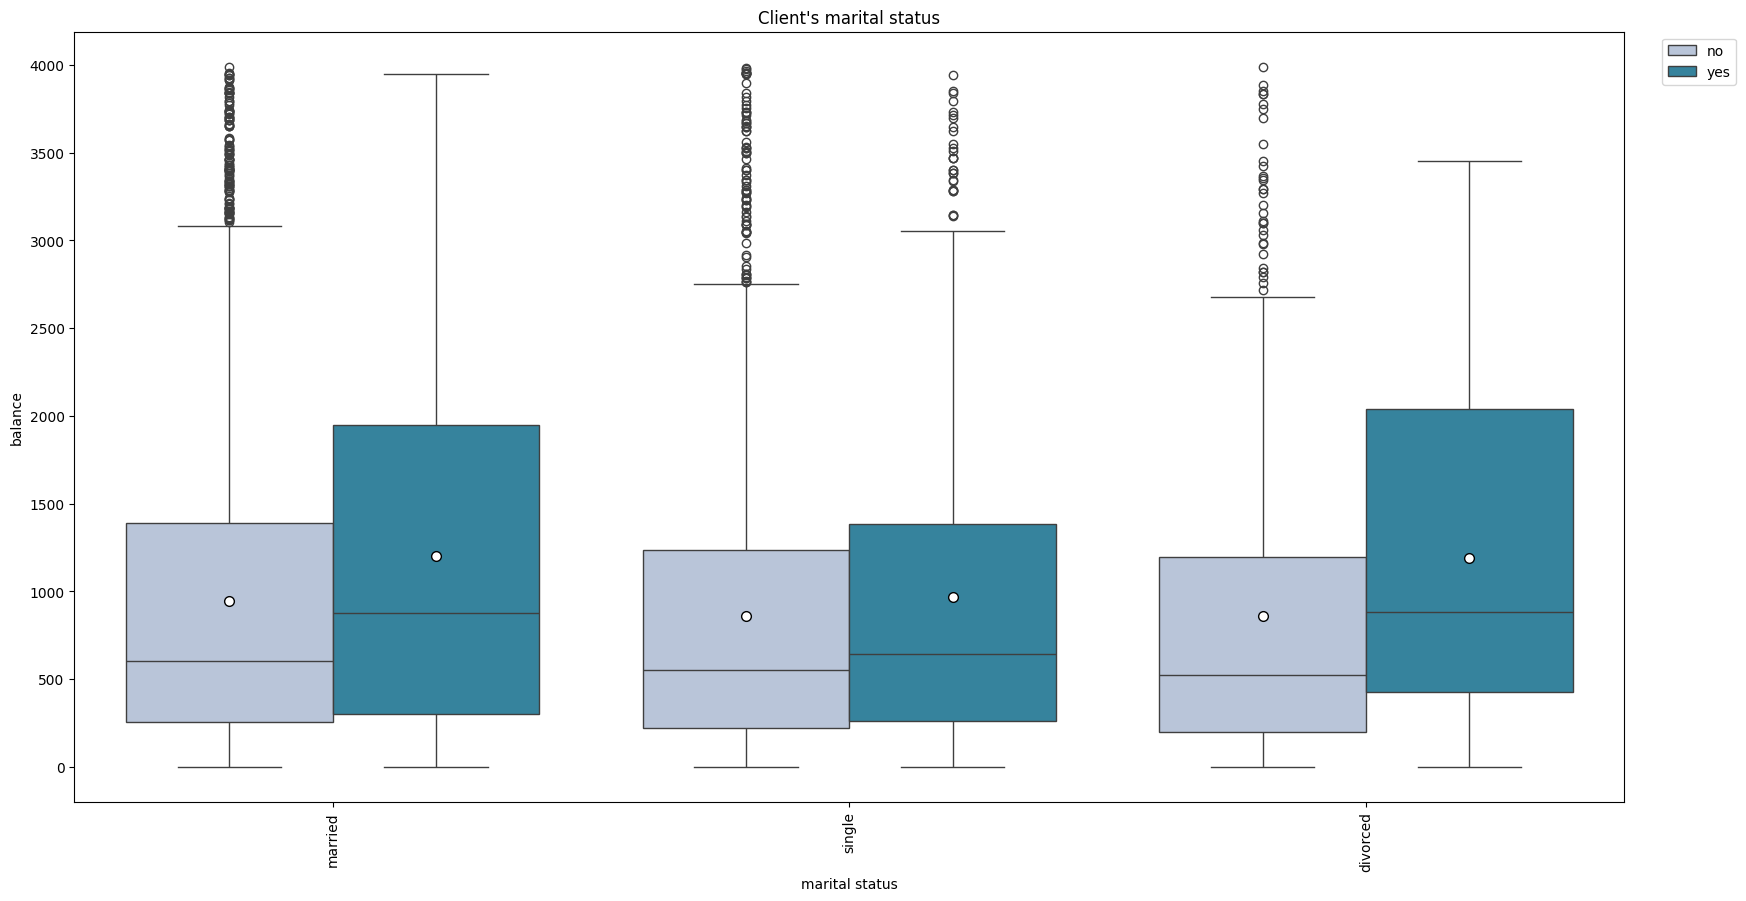

In [34]:
plt.figure(figsize=(20,10))
#plt.ylim(0,120000)
sns.boxplot(x='marital', y='balance', hue="y",palette=("PuBuGn"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"7"},data=data_frame)
plt.title("Client's marital status")
# Set x-axis label
plt.xlabel('marital status')
# Set y-axis label
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('balance')
plt.show()

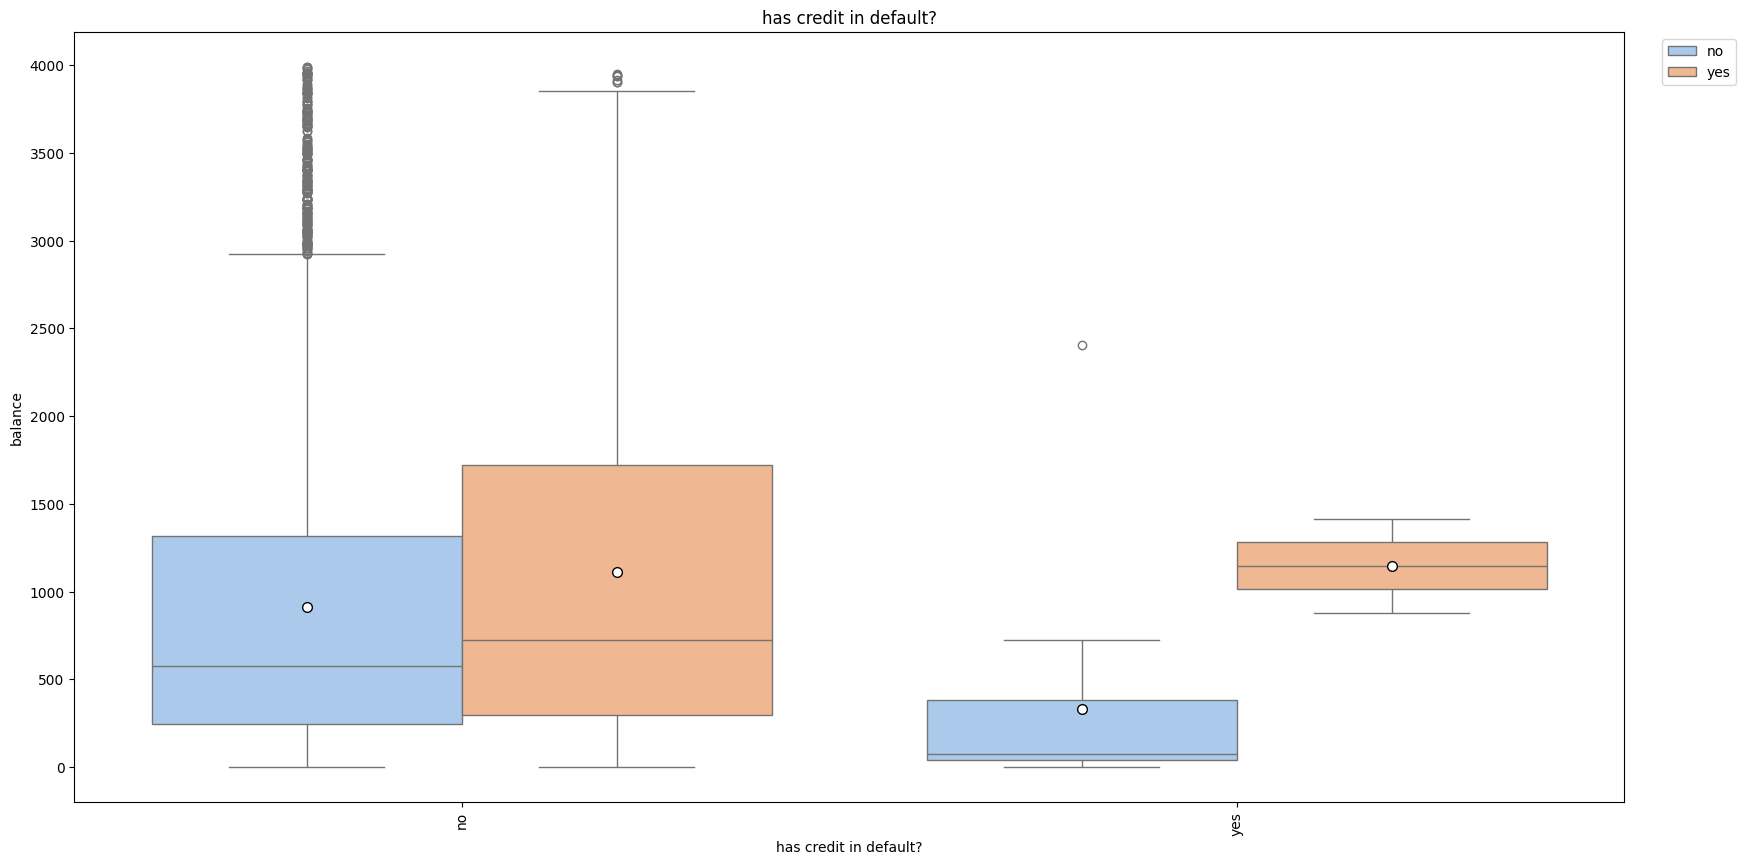

In [35]:
plt.figure(figsize=(20,10))
#plt.ylim(0,120000)
sns.boxplot(x='default', y='balance', hue="y",palette=("pastel"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"7"},data=data_frame)
plt.title("has credit in default?")
# Set x-axis label
plt.xlabel('has credit in default?')
# Set y-axis label
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('balance')
plt.show()

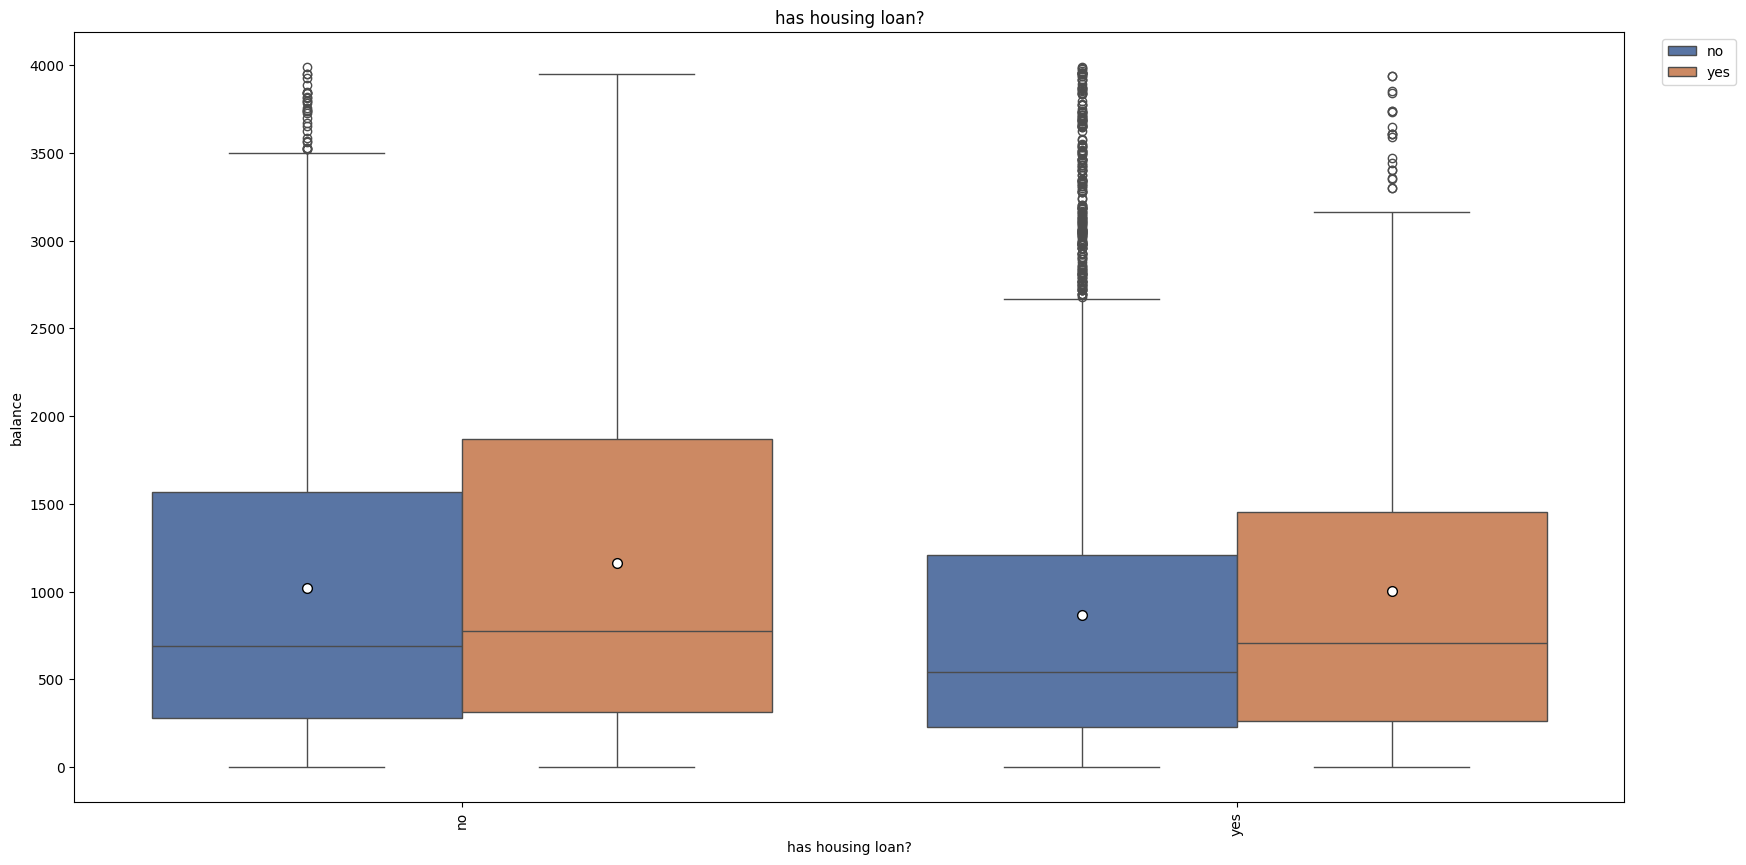

In [37]:
plt.figure(figsize=(20,10))
#plt.ylim(0,120000)
sns.boxplot(x='housing', y='balance', hue="y",palette=("deep"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"7"},data=data_frame)
plt.title("has housing loan?")
# Set x-axis label
plt.xlabel('has housing loan?')
# Set y-axis label
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('balance')
plt.show()

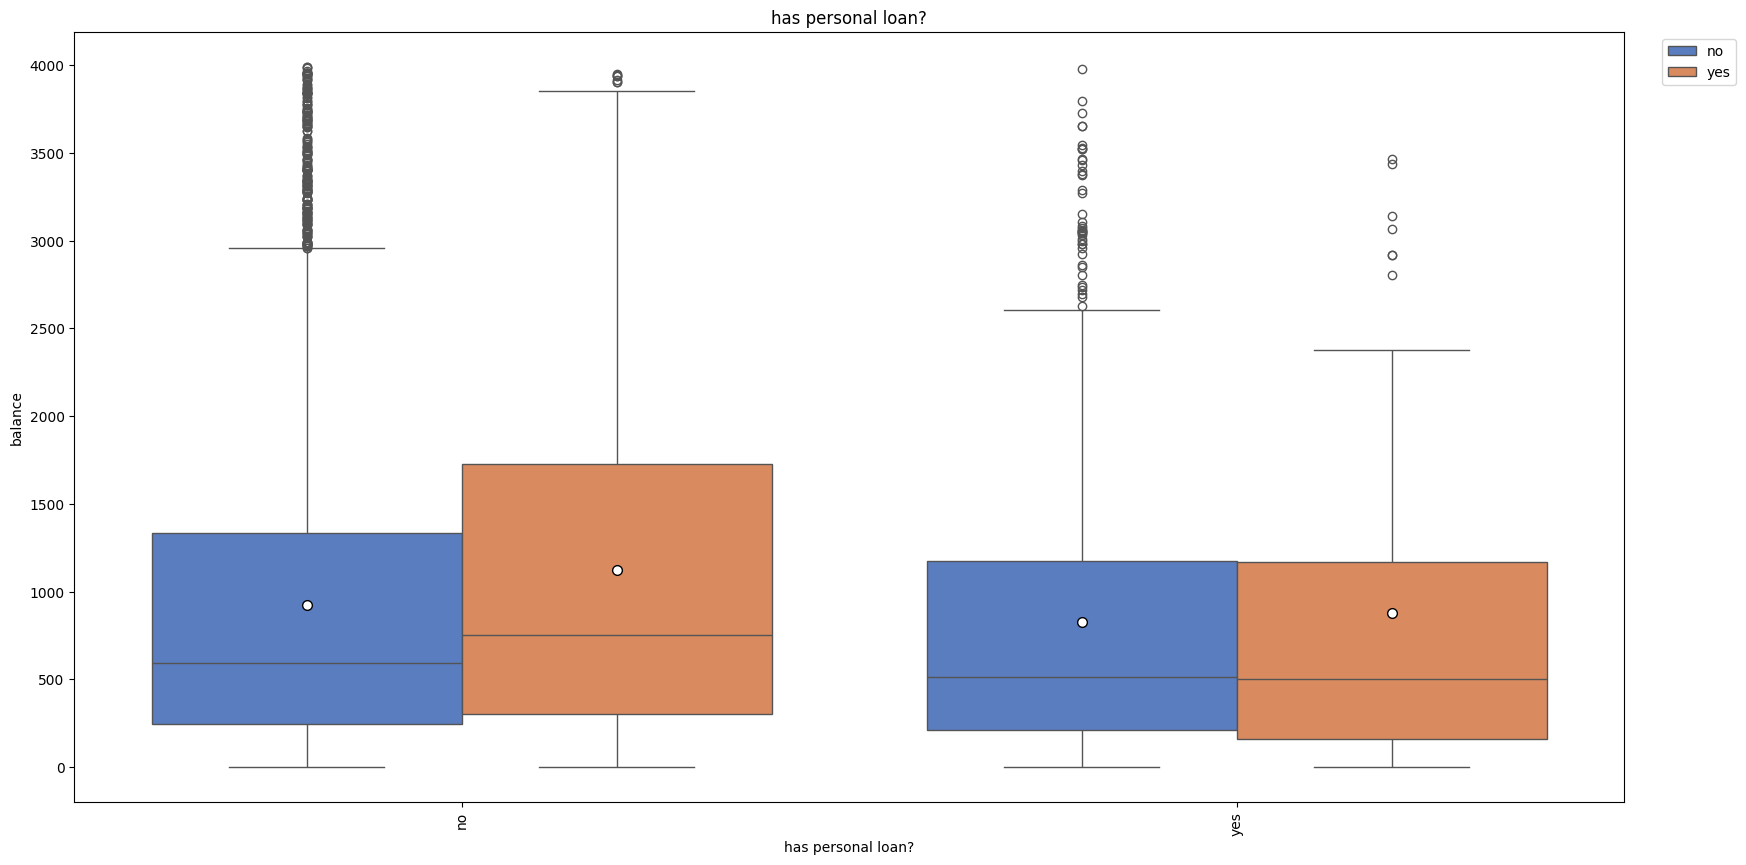

In [38]:
plt.figure(figsize=(20,10))
#plt.ylim(0,120000)
sns.boxplot(x='loan', y='balance', hue="y",palette=("muted"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"7"},data=data_frame)
plt.title("has personal loan?")
# Set x-axis label
plt.xlabel('has personal loan?')
# Set y-axis label
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('balance')
plt.show()

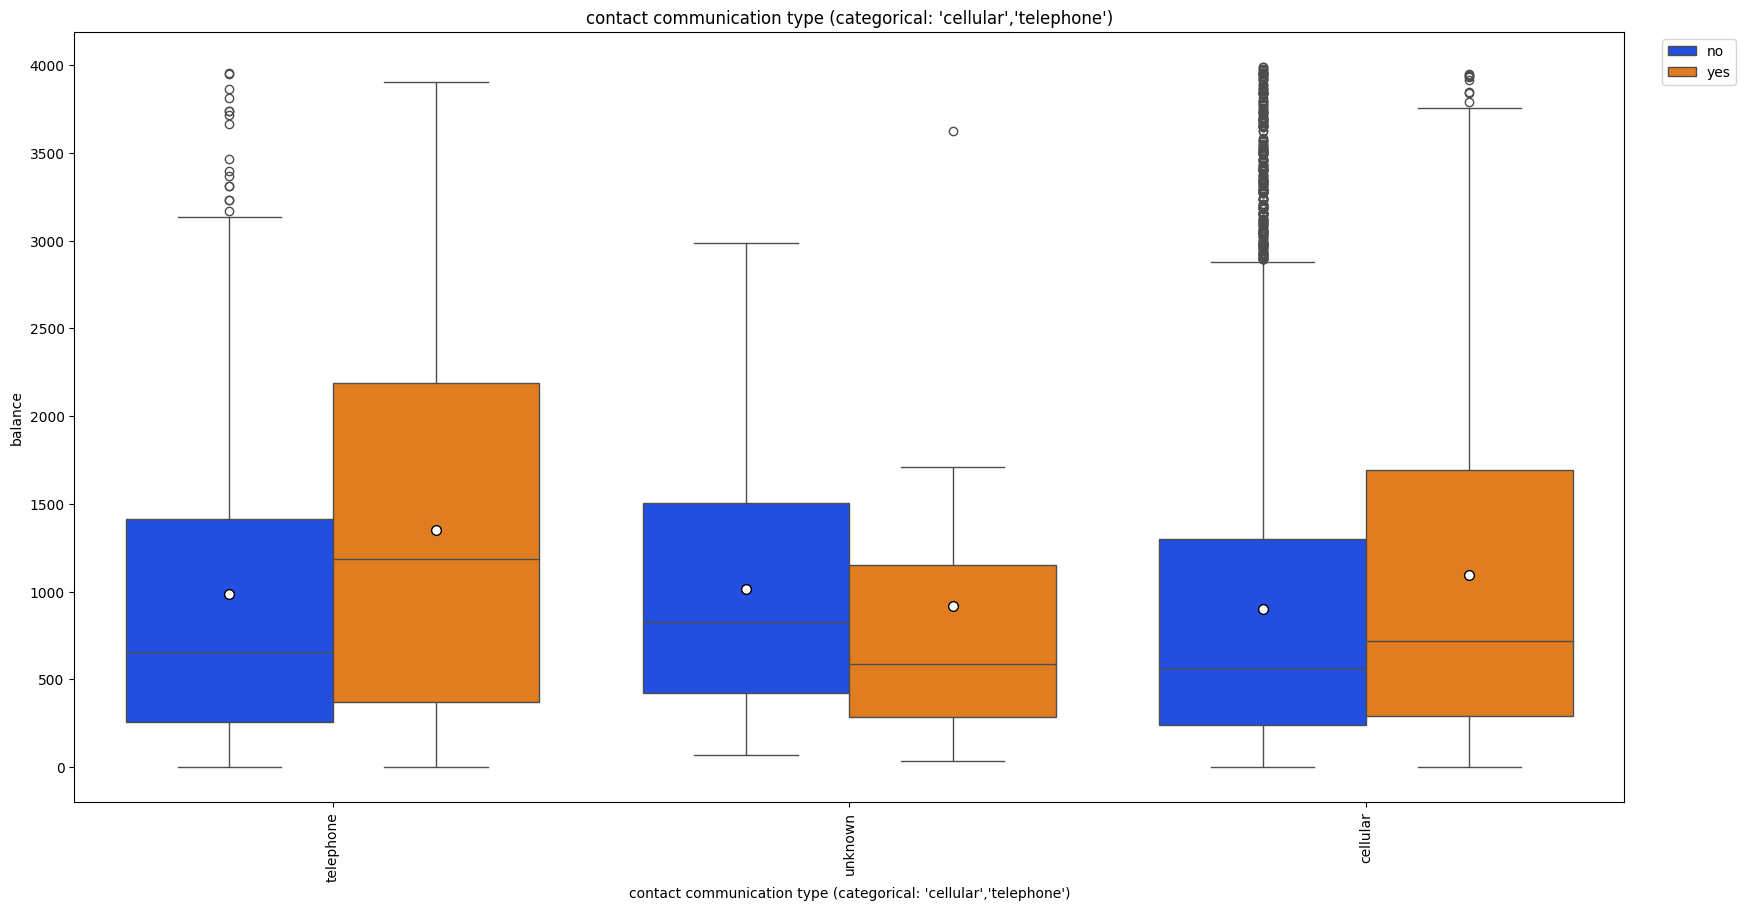

In [40]:
plt.figure(figsize=(20,10))
#plt.ylim(0,120000)
sns.boxplot(x='contact', y='balance', hue="y",palette=("bright"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"7"},data=data_frame)
plt.title("contact communication type (categorical: 'cellular','telephone')")
# Set x-axis label
plt.xlabel("contact communication type (categorical: 'cellular','telephone')")
# Set y-axis label
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('balance')
plt.show()

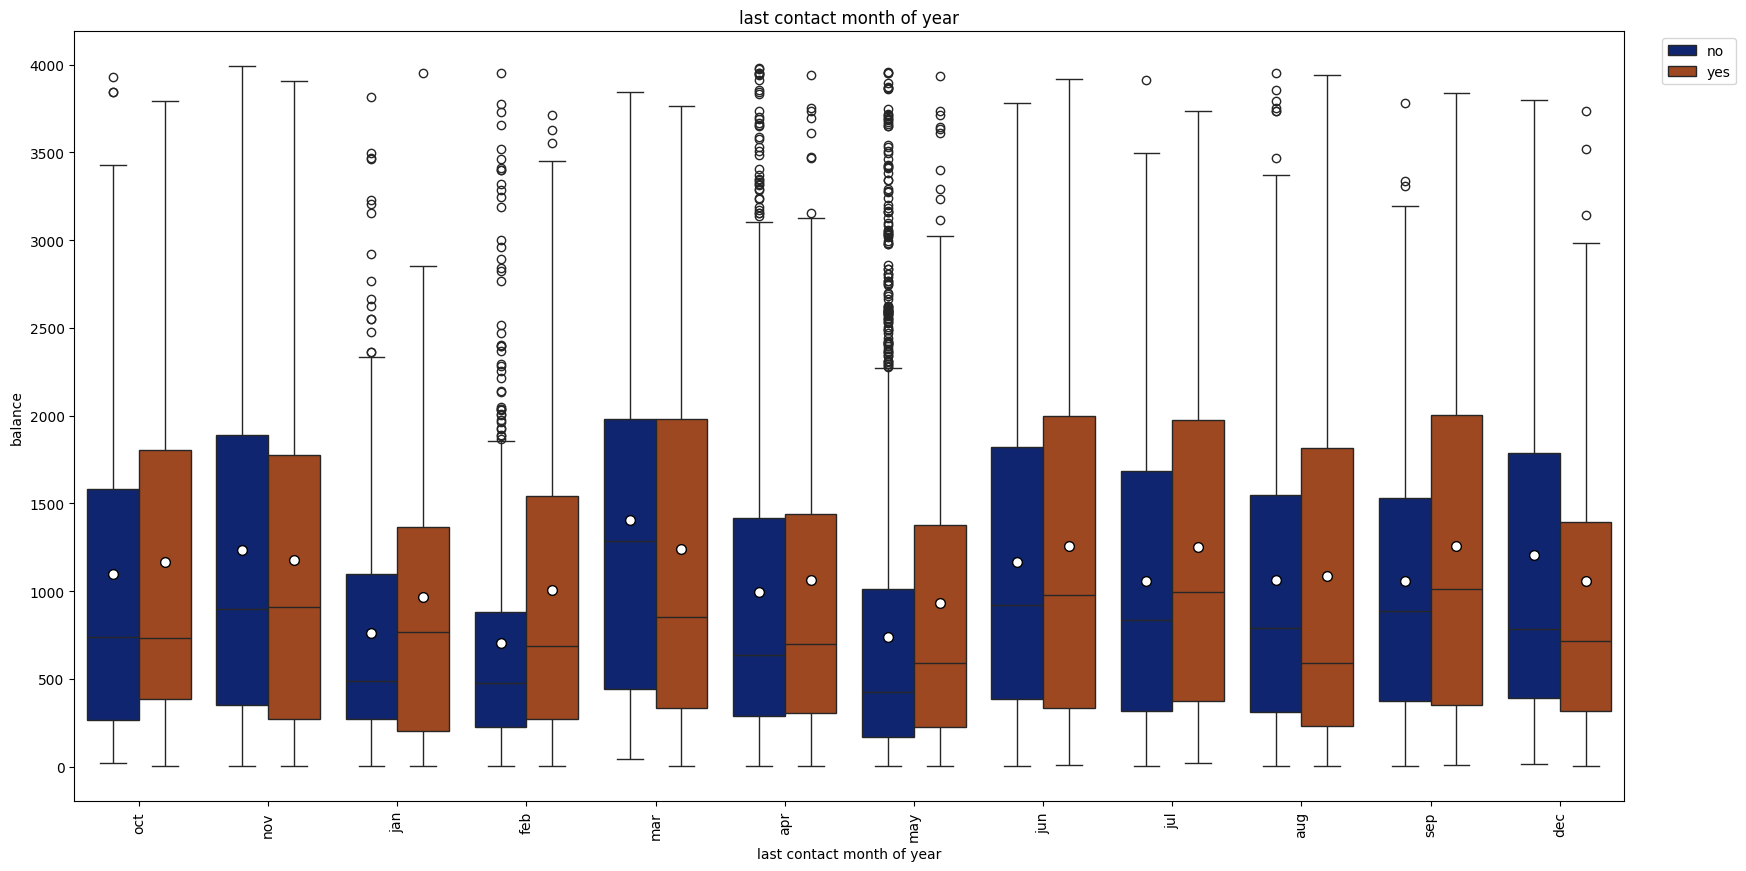

In [41]:
plt.figure(figsize=(20,10))
#plt.ylim(0,120000)
sns.boxplot(x='month', y='balance', hue="y",palette=("dark"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"7"},data=data_frame)
plt.title("last contact month of year")
# Set x-axis label
plt.xlabel("last contact month of year")
# Set y-axis label
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('balance')
plt.show()

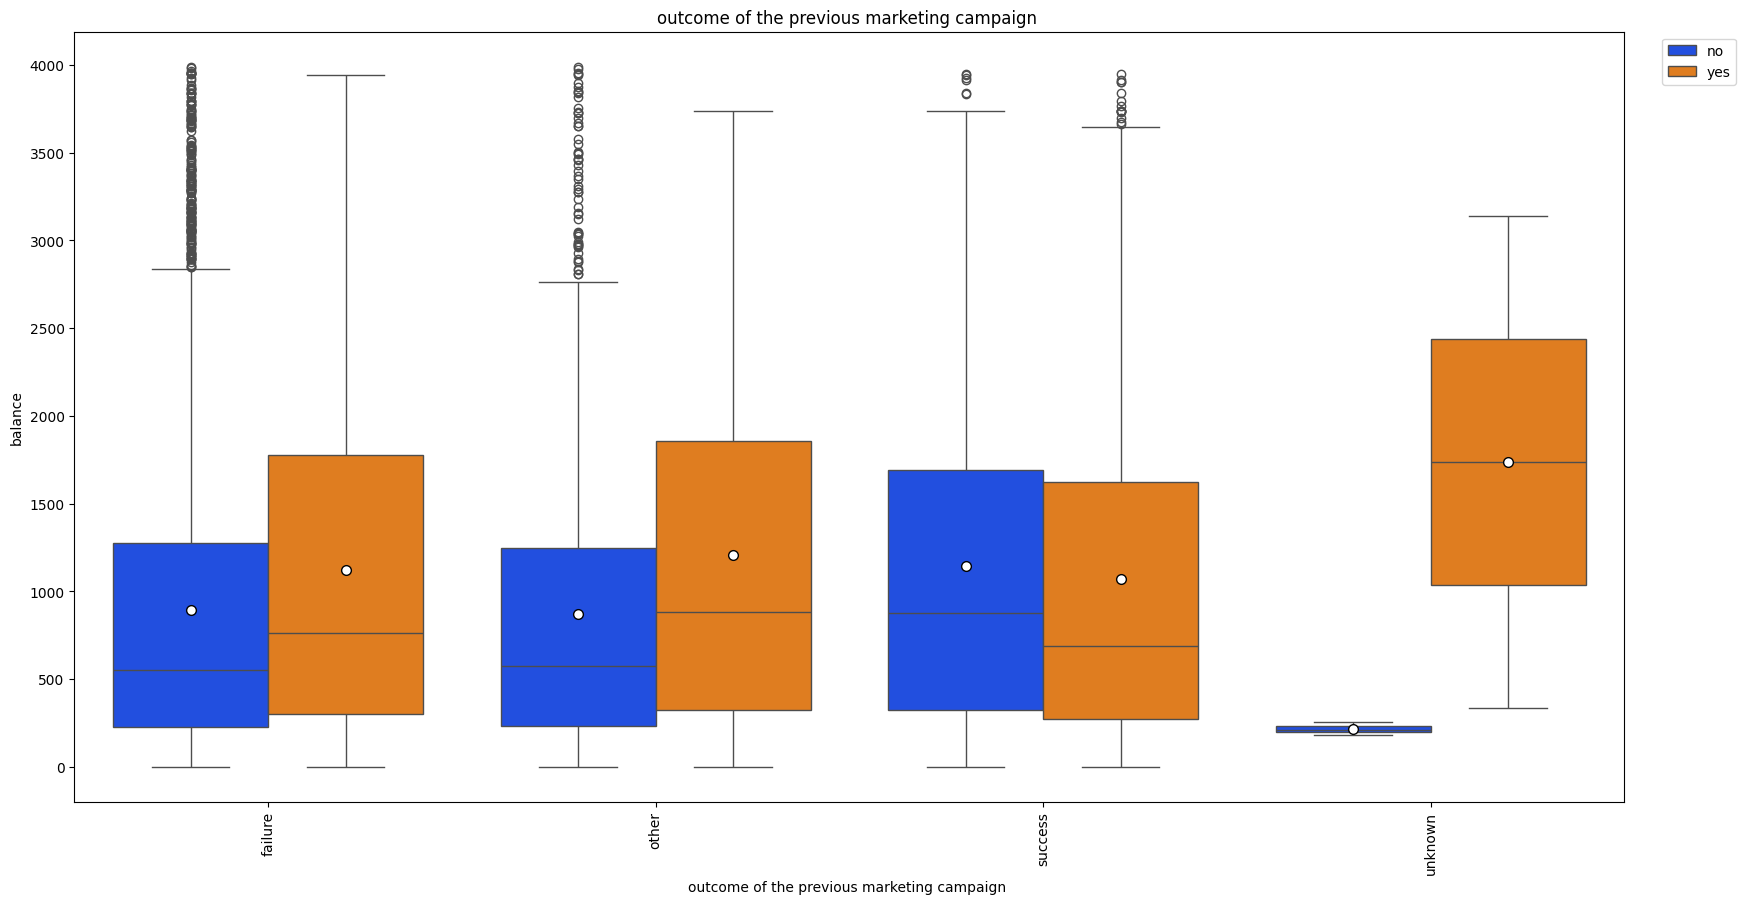

In [42]:
plt.figure(figsize=(20,10))
#plt.ylim(0,120000)
sns.boxplot(x='poutcome', y='balance', hue="y",palette=("bright"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"7"},data=data_frame)
plt.title("outcome of the previous marketing campaign ")
# Set x-axis label
plt.xlabel("outcome of the previous marketing campaign ")
# Set y-axis label
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('balance')
plt.show()

In [43]:
print(data_frame['job'].value_counts(),data_frame['education'].value_counts(),data_frame['contact'].value_counts(),data_frame['month'].value_counts(),
      data_frame['day'].value_counts(),data_frame['marital'].value_counts(),data_frame['poutcome'].value_counts())


job
management       1361
blue-collar      1268
technician       1038
admin.            876
services          546
retired           266
student           244
self-employed     224
entrepreneur      192
unemployed        165
housemaid         110
unknown            26
Name: count, dtype: int64 education
secondary    3329
tertiary     2011
primary       735
unknown       241
Name: count, dtype: int64 contact
cellular     5843
telephone     431
unknown        42
Name: count, dtype: int64 month
may    1902
apr     896
nov     839
feb     734
aug     418
jan     398
jun     256
oct     244
sep     220
jul     185
mar     132
dec      92
Name: count, dtype: int64 day
18    394
15    358
17    358
13    336
20    331
12    314
14    290
4     285
5     281
6     258
2     257
7     255
11    251
8     241
29    224
21    213
30    203
3     191
16    185
19    169
9     151
28    139
26    101
25     89
22     86
1      86
10     82
27     80
24     45
23     41
31     22
Name: count, dtype: 

In [44]:

education_encoded=pd.get_dummies(data_frame['education'])
contact_encoded=pd.get_dummies(data_frame['contact'])
month_encoded=pd.get_dummies(data_frame['month'])
day_encoded=pd.get_dummies(data_frame['day'])
marital_encoded=pd.get_dummies(data_frame['marital'])
poutcome_encoded=pd.get_dummies(data_frame['poutcome'])
job_encoded=pd.get_dummies(data_frame['job'])
df1=pd.concat([data_frame,job_encoded,education_encoded,contact_encoded,month_encoded,day_encoded,marital_encoded,
               poutcome_encoded],axis=1)

In [45]:
ohe_transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['default','housing','loan']),
                                          remainder='passthrough')

In [46]:
data_frame['balance']=data_frame['balance'].div(100)


In [47]:
data_frame.columns = data_frame.columns.astype(str)

In [48]:
X=data_frame.drop(['job','education','duration','contact','month','day','marital','poutcome','y'], axis = 1)
y = data_frame['y']

In [49]:
X_train, X_test, y_train, y_test = train_test_split( X, y,random_state = 42,stratify = y)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>],
       [<Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >]], dtype=object)

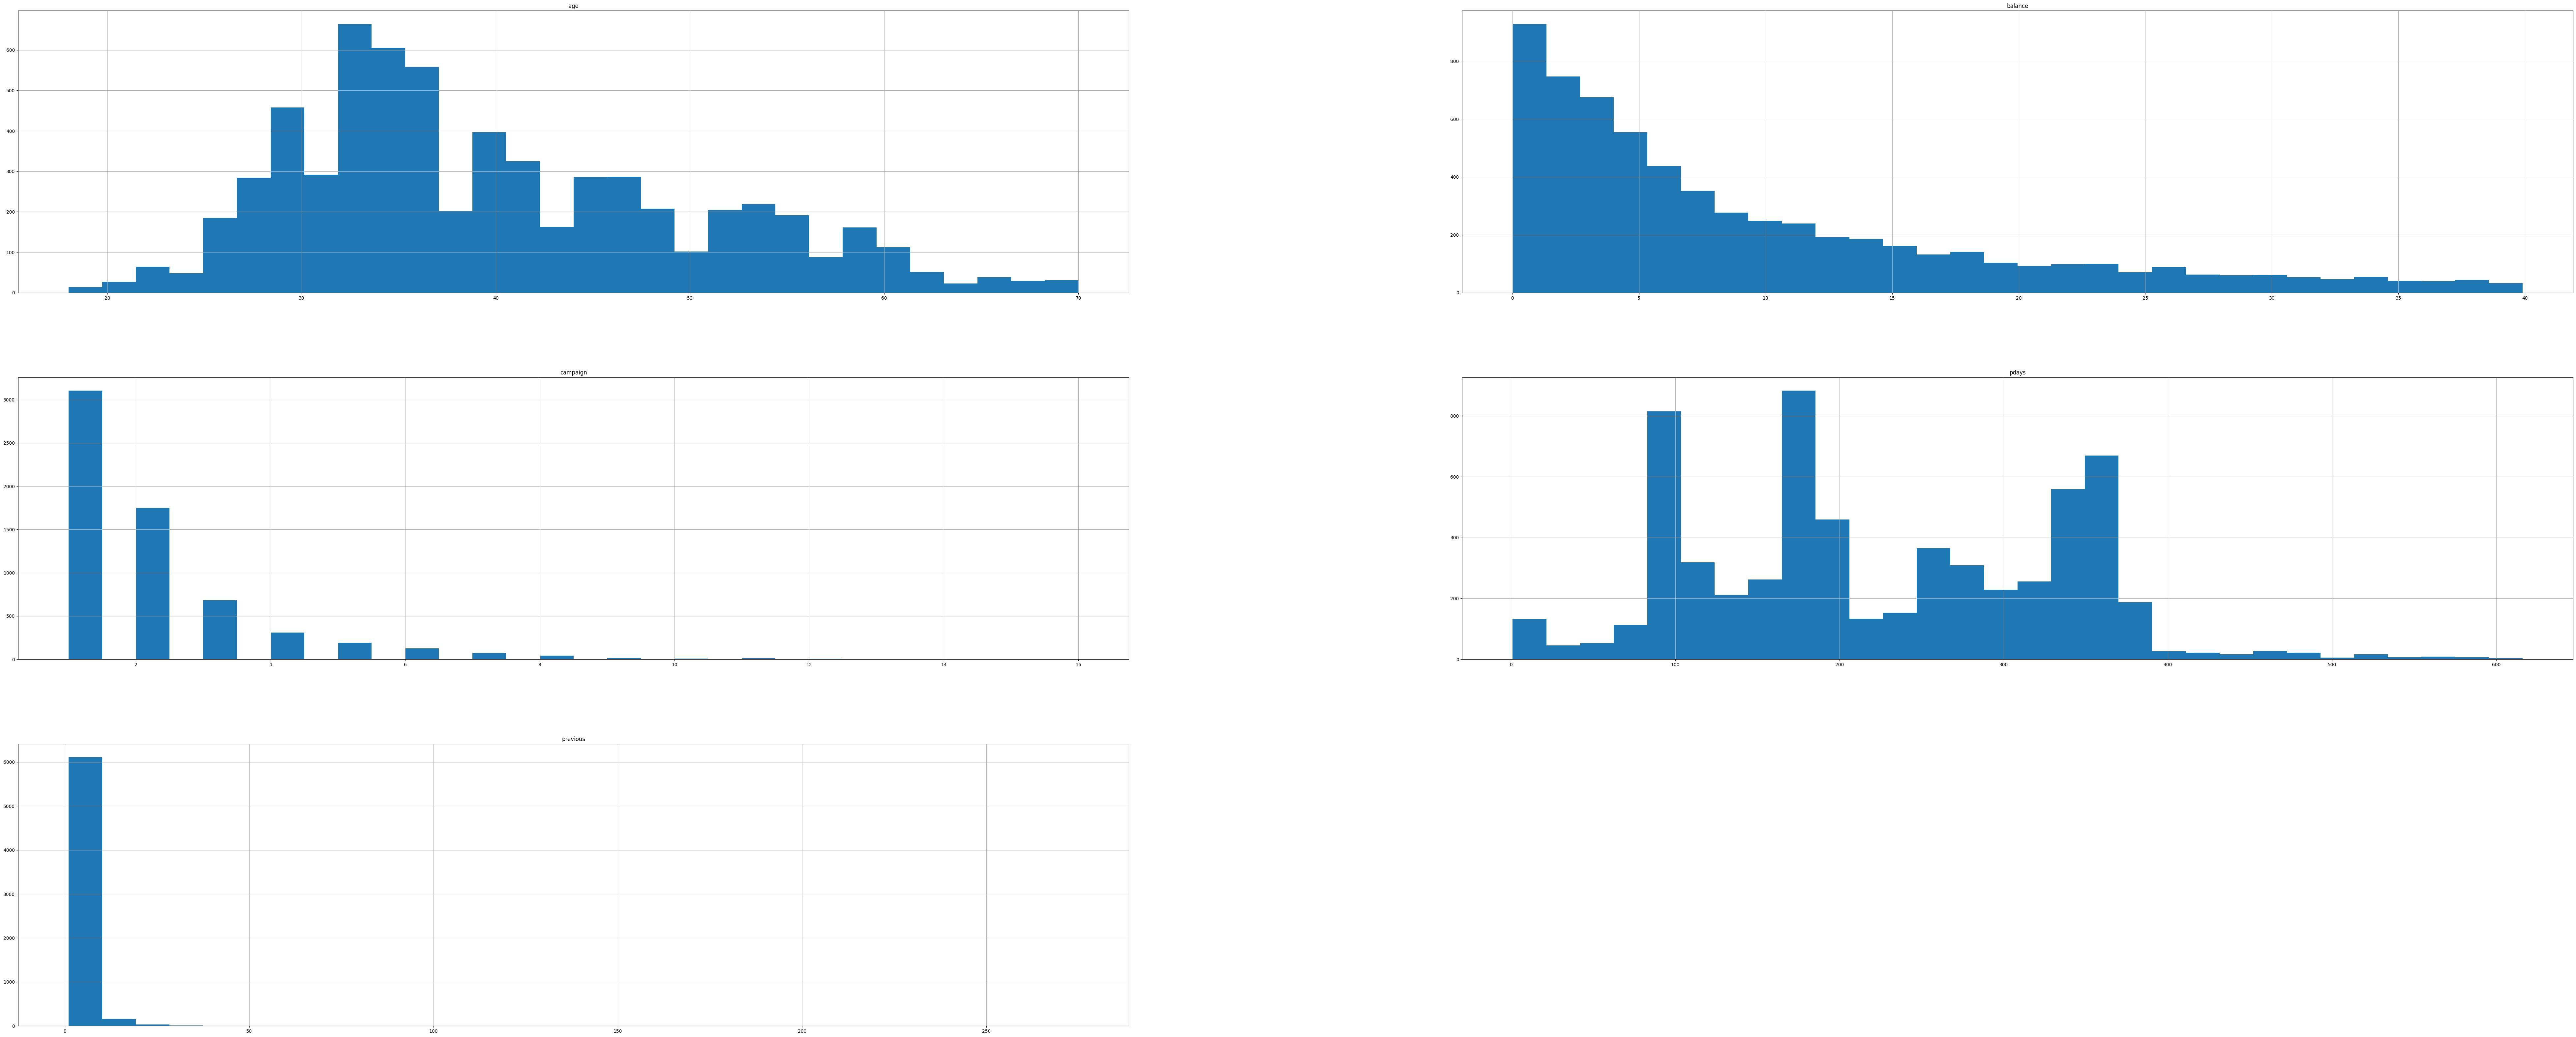

In [50]:
X.hist(bins=30, figsize=(100, 40))

In [51]:
pipeline_knn=Pipeline([('transformer', ohe_transformer),('scale', StandardScaler()), ('knn', KNeighborsClassifier())])
pipeline_knn

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['default', 'housing',
                                                   'loan'])])),
                ('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

In [52]:
from sklearn.compose import ColumnTransformer
Pipeline(steps=[('transformer', ColumnTransformer(remainder='passthrough', transformers=[('onehotencoder',OneHotEncoder(drop='if_binary'),['default', 'housing','loan'])])),('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['default', 'housing',
                                                   'loan'])])),
                ('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

In [53]:
param2_knn={'knn__n_neighbors':np.array(range(1,21,2)),'knn__weights' : ['uniform', 'distance'],'knn__p':[1,2]}

In [54]:
print(X.dtypes)
X.isnull().sum()
X.dropna()

age           int64
default      object
balance     float64
housing      object
loan         object
campaign      int64
pdays         int64
previous      int64
dtype: object


,age,default,balance,housing,loan,campaign,pdays,previous
24060,33,no,8.82,no,no,1,151,3
24064,33,no,34.44,yes,no,1,91,4
24072,36,no,24.15,yes,no,1,86,4
24080,56,no,5.89,yes,no,1,147,2
24086,44,no,13.24,yes,no,1,89,2
...,...,...,...,...,...,...,...,...
45194,59,no,1.38,yes,yes,2,187,5
45195,68,no,11.46,no,no,1,187,6
45199,34,no,14.75,yes,no,3,530,12
45201,53,no,5.83,no,no,1,184,4


In [55]:
print(X.dtypes)

age           int64
default      object
balance     float64
housing      object
loan         object
campaign      int64
pdays         int64
previous      int64
dtype: object


In [56]:
X.columns = X.columns.astype(str)

precision_preds_grid_knn=GridSearchCV(pipeline_knn, param_grid=param2_knn,scoring='roc_auc',cv = 5)
precision_preds_grid_knn.fit(X_train,y_train)


best_score_test_knn=precision_preds_grid_knn.score(X_test,y_test)
best_score_train_knn=precision_preds_grid_knn.score(X_train,y_train)
best_params_precision_preds_knn=precision_preds_grid_knn.best_params_


print(f'roc_auc train: {best_score_train_knn: .3f}',f'roc_auc test: {best_score_test_knn: .3f}')
print("Tuned Hyperparameters KNearestNeighborsClassifier:", best_params_precision_preds_knn)

n_splits_knn  = precision_preds_grid_knn.n_splits_
n_iter_knn = pd.DataFrame(precision_preds_grid_knn.cv_results_).shape[0]
mean_time_knn=np.mean(precision_preds_grid_knn.cv_results_['mean_fit_time'])
print(f'Elapsed Time using GridSearchCV: {mean_time_knn * n_splits_knn * n_iter_knn: .3f}')

roc_auc train:  1.000 roc_auc test:  0.770
Tuned Hyperparameters KNearestNeighborsClassifier: {'knn__n_neighbors': 19, 'knn__p': 1, 'knn__weights': 'distance'}
Elapsed Time using GridSearchCV:  4.155


In [57]:
pipeline_lgr=Pipeline([('transformer', ohe_transformer),('scale', StandardScaler()),
                       ('log', LogisticRegression(random_state=42, class_weight='balanced'))])
pipeline_lgr
Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['default', 'housing',
                                                   'loan'])])),
                ('scale', StandardScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', random_state=42))])

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['default', 'housing',
                                                   'loan'])])),
                ('scale', StandardScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [59]:
param2_lgr = {'log__penalty' : ['l1','l2'],'log__C': np.logspace(-3,3,7),
              'log__solver': ['newton-cg', 'lbfgs', 'liblinear']}

In [60]:
pipeline_lgr=Pipeline([('transformer', ohe_transformer),('scale', StandardScaler()), ('log', LogisticRegression(random_state=42, class_weight='balanced'))])
precision_preds_grid_lgr=GridSearchCV(pipeline_lgr, param_grid=param2_lgr,scoring='roc_auc',cv = 5)
precision_preds_grid_lgr.fit(X_train,y_train)


best_score_test_lgr=precision_preds_grid_lgr.score(X_test,y_test)
best_score_train_lgr=precision_preds_grid_lgr.score(X_train,y_train)
best_params_precision_preds_lgr=precision_preds_grid_lgr.best_params_

print(f'roc_auc train: {best_score_train_lgr: .3f}',f'roc_auc test: {best_score_test_lgr: .3f}')
print("Tuned Hyperparameters Logistic Regression :", best_params_precision_preds_lgr)

n_splits_lgr  = precision_preds_grid_lgr.n_splits_
n_iter_lgr = pd.DataFrame(precision_preds_grid_lgr.cv_results_).shape[0]
mean_time_lgr=np.mean(precision_preds_grid_lgr.cv_results_['mean_fit_time'])
print(f'Elapsed Time using GridSearchCV: {mean_time_lgr* n_splits_lgr * n_iter_lgr: .3f}')

roc_auc train:  0.728 roc_auc test:  0.760
Tuned Hyperparameters Logistic Regression : {'log__C': 10.0, 'log__penalty': 'l2', 'log__solver': 'newton-cg'}
Elapsed Time using GridSearchCV:  5.849


In [61]:
pipeline_svc=Pipeline(steps=[('transformer', ohe_transformer),('scale', StandardScaler()),
                             ('svc', SVC(probability=True))])
pipeline_svc

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['default', 'housing',
                                                   'loan'])])),
                ('scale', StandardScaler()), ('svc', SVC(probability=True))])

In [62]:
Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['default', 'housing',
                                                   'loan'])])),
                ('scale', StandardScaler()), ('svc', SVC(probability=True))])

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['default', 'housing',
                                                   'loan'])])),
                ('scale', StandardScaler()), ('svc', SVC(probability=True))])

In [64]:
param2_svc = {'svc__kernel': ['rbf', 'poly', 'linear','sigmoid'],'svc__gamma': [0.01,0.1, 1.0,10]}

In [ ]:
pipeline_svc=Pipeline(steps=[('transformer', ohe_transformer),('scale', StandardScaler()),('svc', SVC(probability=True))])
precision_preds_grid_svc=GridSearchCV(pipeline_svc, param_grid=param2_svc,scoring='roc_auc',cv=5)
precision_preds_grid_svc.fit(X_train,y_train)


best_score_test_svc=precision_preds_grid_svc.score(X_test,y_test)
best_score_train_svc=precision_preds_grid_svc.score(X_train,y_train)
best_params_precision_preds_svc=precision_preds_grid_svc.best_params_

print(f'roc_auc train: {best_score_train_svc: .3f}',f'roc_auc test: {best_score_test_svc: .3f}')
print("Tuned Hyperparameters SVC :", best_params_precision_preds_svc)

n_splits_svc  = precision_preds_grid_svc.n_splits_
n_iter_svc = pd.DataFrame(precision_preds_grid_svc.cv_results_).shape[0]
mean_time_svc=np.mean(precision_preds_grid_svc.cv_results_['mean_fit_time'])
print(f'Elapsed Time using GridSearchCV: {mean_time_svc * n_splits_svc * n_iter_svc: .3f}')

In [ ]:
roc_auc train:  0.871 roc_auc test:  0.847
Tuned Hyperparameters SVC : {'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
Elapsed Time using GridSearchCV:  297.567